Javier Alemán Rodríguez

# Clasificación de la calidad de vinos (vinos rojos)

## Extracción y transformación de datos

### Importación de librerías

Instalar las librerías que sean necesarias

In [ ]:
!pip install joblib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import joblib
from sklearn import preprocessing
import warnings

### Importación del dataset

In [2]:
url = 'https://raw.githubusercontent.com/JaviARo/Datasets/main/Wine_quality'

wine_quality = pd.read_csv(f'{url}/winequality-white.csv', sep=';')

In [3]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Separamos variables de entrada y variable objetivo

In [4]:
X = wine_quality.drop(["quality"], axis=1)
y = wine_quality["quality"]

### Escalamiento de datos

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

In [6]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194


### Separación de datos de entrenamiento y test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Selección de características

### Matriz de correlación

<Axes: >

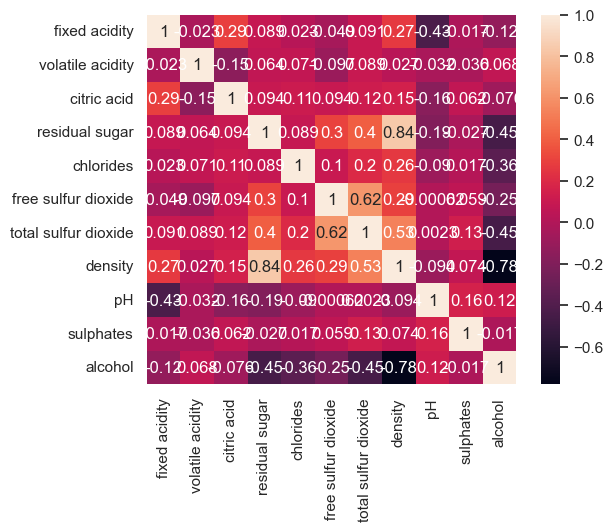

In [8]:
sns.set()
sns.heatmap(X.corr(), square=True, annot=True)

### SelectKBest

In [9]:
def ApplySelectKBest(X_train, X_test, y_train, k):
	selector = SelectKBest(f_regression, k=k)

	selector.fit_transform(X_train, y_train)
	selector.transform(X_test)

	print(f"Mejores {k} columnas = [")
	for col in selector.get_feature_names_out():
		print(f"  \'{col}\'")
	print("]\n")

In [15]:
ApplySelectKBest(X_train, X_test, y_train, 1)
ApplySelectKBest(X_train, X_test, y_train, 2)

Mejores 1 columnas = [
  'alcohol'
]

Mejores 2 columnas = [
  'density'
  'alcohol'
]



### Quitamos características

Quitamos las siguientes columnas:
* "residual": Tiene una fuerte correlación positiva con la columnas de "density", la cuale tiene una relevancia mayor en el dataset según SelectKBest.

Aunque "alcohol" y "density" tienen una fuerte correlación negativa, he optado por no quitar ninguna de las dos columnas por ser las dos más relevantes.

In [16]:
X = X.drop(columns=["residual sugar"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Modelos de árboles
### Función para aplicar validación cruzada

In [17]:
cv = KFold(n_splits = 5, shuffle = True, random_state=42) # shuffle = False si hay dimensión temporal

In [18]:
def cross_validation(clf, cv, X_train, y_train):
	fold_accuracy = []
	for train_fold, test_fold in cv.split(X_train):
		# División train test aleatoria
		f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
		f_train_y = y_train.iloc[train_fold]
		# entrenamiento y ejeución del modelo
		clf.fit(f_train_x, f_train_y)
		# Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
		y_pred = clf.predict(X_train.iloc[test_fold])
		# evaluación del modelo
		acc = accuracy_score(y_train.iloc[test_fold], y_pred)
		fold_accuracy.append(acc)
	return sum(fold_accuracy)/len(fold_accuracy)

### Árbol de decisión - Clasificación

In [19]:
for i in range(1, 20):
  tree = DecisionTreeClassifier(max_depth = i, random_state = 1)
  score = cross_validation(tree, cv, X_train, y_train)
  print("Profundidad del árbol: %i - Precisión: %f" % (i, score))

Profundidad del árbol: 1 - Precisión: 0.440790
Profundidad del árbol: 2 - Precisión: 0.510206
Profundidad del árbol: 3 - Precisión: 0.516848
Profundidad del árbol: 4 - Precisión: 0.525521
Profundidad del árbol: 5 - Precisión: 0.525015
Profundidad del árbol: 6 - Precisión: 0.520420
Profundidad del árbol: 7 - Precisión: 0.531393
Profundidad del árbol: 8 - Precisión: 0.539314
Profundidad del árbol: 9 - Precisión: 0.543144
Profundidad del árbol: 10 - Precisión: 0.550541
Profundidad del árbol: 11 - Precisión: 0.554116
Profundidad del árbol: 12 - Precisión: 0.558454
Profundidad del árbol: 13 - Precisión: 0.567131
Profundidad del árbol: 14 - Precisión: 0.567134
Profundidad del árbol: 15 - Precisión: 0.566366
Profundidad del árbol: 16 - Precisión: 0.567132
Profundidad del árbol: 17 - Precisión: 0.569426
Profundidad del árbol: 18 - Precisión: 0.574019
Profundidad del árbol: 19 - Precisión: 0.582187


### Árbol de decisión - Regresión

In [20]:
for i in range(1, 20):
  tree = DecisionTreeRegressor(max_depth = i, random_state = 1)
  score = cross_val_score(tree, X, y, cv=5)
  score = score.mean()
  print("Profundidad del árbol: %i - Precisión: %f" % (i, score))

Profundidad del árbol: 1 - Precisión: 0.140028
Profundidad del árbol: 2 - Precisión: 0.207305
Profundidad del árbol: 3 - Precisión: 0.240171
Profundidad del árbol: 4 - Precisión: 0.246382
Profundidad del árbol: 5 - Precisión: 0.238925
Profundidad del árbol: 6 - Precisión: 0.218575
Profundidad del árbol: 7 - Precisión: 0.104011
Profundidad del árbol: 8 - Precisión: 0.065241
Profundidad del árbol: 9 - Precisión: 0.046507
Profundidad del árbol: 10 - Precisión: -0.023216
Profundidad del árbol: 11 - Precisión: -0.137961
Profundidad del árbol: 12 - Precisión: -0.211252
Profundidad del árbol: 13 - Precisión: -0.283048
Profundidad del árbol: 14 - Precisión: -0.295382
Profundidad del árbol: 15 - Precisión: -0.354533
Profundidad del árbol: 16 - Precisión: -0.378676
Profundidad del árbol: 17 - Precisión: -0.424586
Profundidad del árbol: 18 - Precisión: -0.434352
Profundidad del árbol: 19 - Precisión: -0.451091


### Clasificador Bagging

In [21]:
warnings.filterwarnings("ignore", category=FutureWarning)

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

bgclassifier = BaggingClassifier(
  base_estimator=pipeline, 
  n_estimators=100,
  max_features=9,
  max_samples=100,
  random_state=1, n_jobs=5
)

score = cross_validation(bgclassifier, cv, X_train, y_train)
score = score.mean()
print('Precisión: %f, ' %score)

Precisión: 0.530633, 


### Clasificadores RandomForest, AdaBoost y GradientBoosting

In [22]:
l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

for estimators in l_estimators:
	print("------ Número de estimadores: %i ------" %estimators)
	classifiers = []
	classifiers.append(RandomForestClassifier(n_estimators= estimators, criterion='gini', random_state=0))
	classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, criterion='gini'), n_estimators=estimators, random_state=0))
	classifiers.append(GradientBoostingClassifier(n_estimators=estimators, learning_rate=0.25, random_state=0, loss='log_loss'))
	for clf in classifiers:
		class_name = str(clf)
		score = cross_validation(clf, cv, X_train, y_train)
		print("Clasificador %s: %f" % (class_name[:class_name.find("(")], score))

------ Número de estimadores: 2 ------
Clasificador RandomForestClassifier: 0.543131
Clasificador AdaBoostClassifier: 0.505621
Clasificador GradientBoostingClassifier: 0.527821
------ Número de estimadores: 4 ------
Clasificador RandomForestClassifier: 0.596482
Clasificador AdaBoostClassifier: 0.492599
Clasificador GradientBoostingClassifier: 0.539309
------ Número de estimadores: 8 ------
Clasificador RandomForestClassifier: 0.625833
Clasificador AdaBoostClassifier: 0.479581
Clasificador GradientBoostingClassifier: 0.560240
------ Número de estimadores: 16 ------
Clasificador RandomForestClassifier: 0.646507
Clasificador AdaBoostClassifier: 0.433136
Clasificador GradientBoostingClassifier: 0.574532
------ Número de estimadores: 32 ------
Clasificador RandomForestClassifier: 0.653651
Clasificador AdaBoostClassifier: 0.432886
Clasificador GradientBoostingClassifier: 0.586787
------ Número de estimadores: 64 ------
Clasificador RandomForestClassifier: 0.659014
Clasificador AdaBoostClassi

## Modelo elegido

In [23]:
classifier = RandomForestClassifier(n_estimators= 2048, criterion='gini', random_state=0)

print(f"Precisión: {cross_validation(classifier, cv, X_train, y_train)}")

Precisión: 0.6641172752625955


### Matriz de confusión con los datos de test

In [25]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n"
      +classification_report(y_true, y_pred))

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.75      0.10      0.18        29
           5       0.69      0.62      0.66       293
           6       0.62      0.79      0.70       435
           7       0.71      0.55      0.62       184
           8       0.85      0.30      0.44        37

    accuracy                           0.66       980
   macro avg       0.60      0.39      0.43       980
weighted avg       0.67      0.66      0.64       980

Normalized confusion matrix
[[0.         0.         0.5        0.5        0.         0.        ]
 [0.         0.10344828 0.55172414 0.34482759 0.         0.        ]
 [0.         0.00341297 0.62457338 0.36518771 0.00682594 0.        ]
 [0.         0.         0.13793103 0.79310345 0.06896552 0.        ]
 [0.         0.         0.02173913 0.41847826 0.54891304 0.01086957]
 [0.         0.         0.02702703 0.40540541 0.27027027 0.2972973 ]]


c:\Users\redbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\redbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\redbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

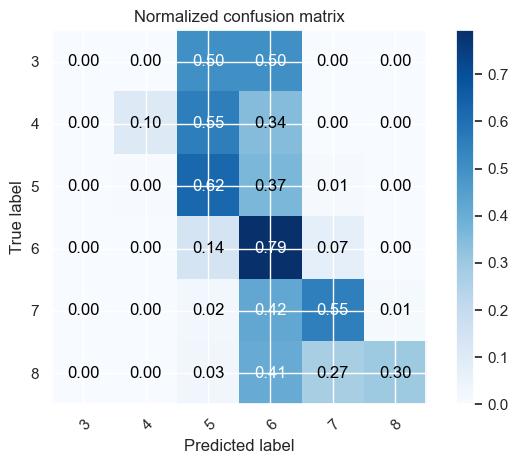

In [26]:
y_pred = classifier.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes = unique_labels(y_test, y_pred), normalize=True)

### Exportación del modelo

In [27]:
joblib.dump(clf,'Act_3_5_modelo_vinos_blancos.pkl')

['Act_3_5_modelo_vinos_blancos.pkl']

### Comparación precisión variable con modelo importado

In [30]:
print(f"Precisión con los datos de test: {classifier.score(X_test, y_test)}")
print(f"Precisión con todo el dataset: {classifier.score(X, y)}")

Precisión con los datos de test: 0.6561224489795918
Precisión con todo el dataset: 0.8777051857901185


### Importación del modelo

In [31]:
clf_entrenado = joblib.load('Act_3_5_modelo_vinos_blancos.pkl')
print(f"Precisión con los datos de test: {clf_entrenado.score(X_test, y_test)}")
print(f"Precisión con todo el dataset: {clf_entrenado.score(X, y)}")

Precisión con los datos de test: 0.6173469387755102
Precisión con todo el dataset: 0.8628011433238056


### Matriz de confusión

Metrics 
              precision    recall  f1-score   support

           3       0.80      0.80      0.80        20
           4       0.84      0.76      0.80       163
           5       0.87      0.87      0.87      1457
           6       0.87      0.89      0.88      2198
           7       0.85      0.84      0.84       880
           8       0.86      0.73      0.79       175
           9       0.62      1.00      0.77         5

    accuracy                           0.86      4898
   macro avg       0.82      0.84      0.82      4898
weighted avg       0.86      0.86      0.86      4898

Normalized confusion matrix
[[8.00000000e-01 5.00000000e-02 5.00000000e-02 5.00000000e-02
  0.00000000e+00 0.00000000e+00 5.00000000e-02]
 [6.13496933e-03 7.60736196e-01 1.59509202e-01 6.13496933e-02
  1.22699387e-02 0.00000000e+00 0.00000000e+00]
 [2.05902539e-03 1.16678106e-02 8.67536033e-01 1.07069321e-01
  9.60878518e-03 1.37268360e-03 6.86341798e-04]
 [0.00000000e+00 1.36487716e-03 6.50

<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

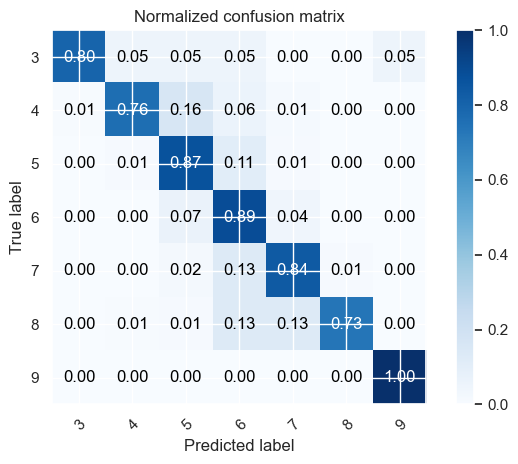

In [32]:
y_pred = clf_entrenado.predict(X)
plot_confusion_matrix(y, y_pred, classes = unique_labels(y_test, y_pred), normalize=True)